In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

link = "https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv"
taxi = pd.read_csv(link, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


<Axes: xlabel='source'>

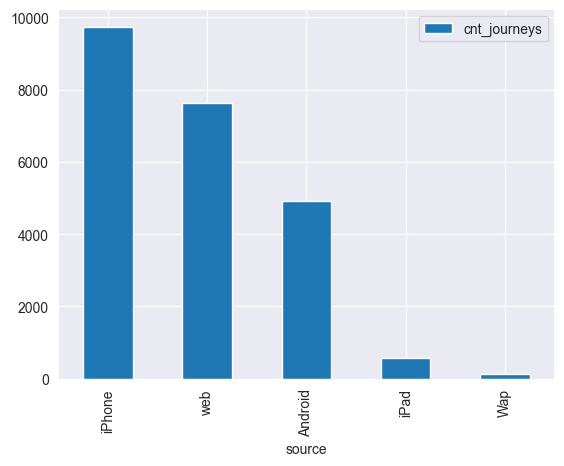

In [12]:
sources_data = taxi.groupby('source', as_index=False).agg({'journey_id': 'count'}).rename(
    columns={'journey_id': 'cnt_journeys'})

(sources_data.cnt_journeys.max() / sources_data.cnt_journeys.sum()).round(4) * 100

sources_data.sort_values("cnt_journeys", ascending=False).plot(kind='bar', x="source", y="cnt_journeys")

<Axes: xlabel='source', ylabel='cnt_journeys'>

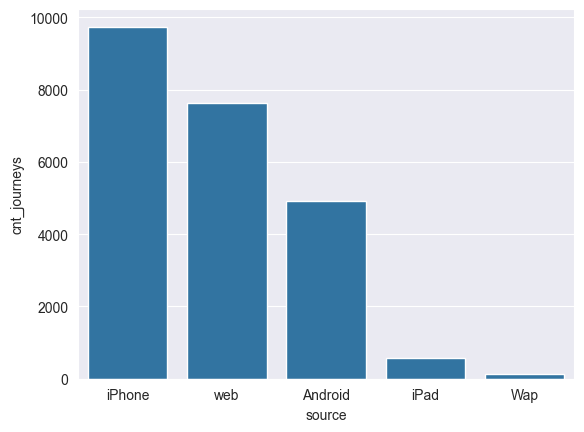

In [13]:
sns.barplot(x="source", y="cnt_journeys", data=sources_data.sort_values(by="cnt_journeys", ascending=False))

<Axes: xlabel='count', ylabel='icon'>

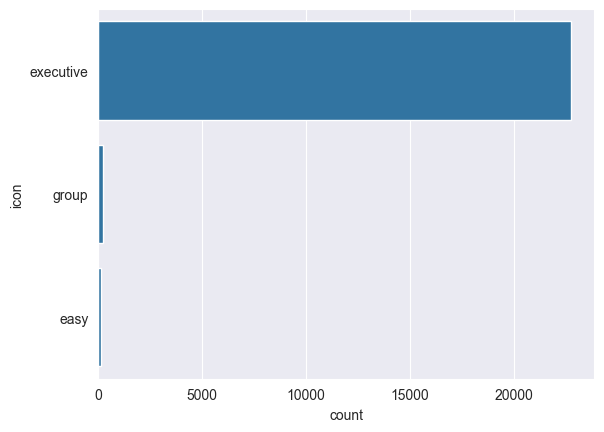

In [14]:
sns.countplot(taxi['icon'])

<Axes: xlabel='count', ylabel='end_state'>

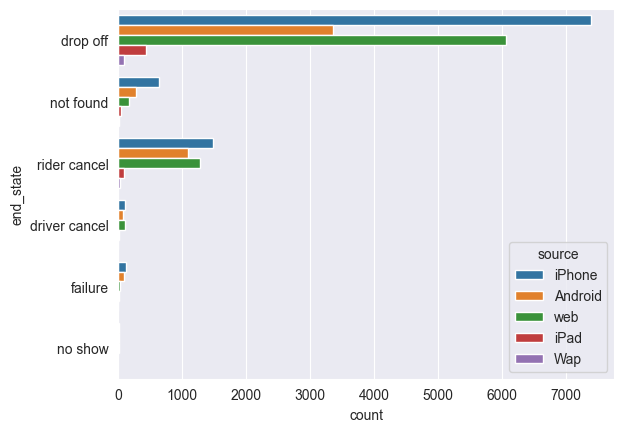

In [15]:
sns.countplot(taxi, y='end_state', hue='source')

In [36]:
driver_score_counts = taxi.groupby('driver_score', as_index=False).agg({'journey_id': 'count'}).rename(
    columns={'journey_id': 'rides_count'}).sort_values(by='driver_score')
driver_score_counts['percentage'] = driver_score_counts['rides_count'] / driver_score_counts['rides_count'].sum()
driver_score_counts['percentage'] = driver_score_counts['percentage'].mul(100).round(2)
driver_score_counts

,driver_score,rides_count,percentage
0,0.0,1094,14.30
1,1.0,94,1.23
2,2.0,62,0.81
3,3.0,227,2.97
4,4.0,1674,21.88
5,5.0,4499,58.81


In [38]:
rider_score_counts = taxi.groupby('rider_score', as_index=False).agg({'journey_id': 'count'}).rename(
    columns={'journey_id': 'rides_count'}).sort_values(by='rider_score')
rider_score_counts['percentage'] = rider_score_counts['rides_count'] / rider_score_counts['rides_count'].sum()
rider_score_counts['percentage'] = rider_score_counts['percentage'].mul(100).round(2)
rider_score_counts

,rider_score,rides_count,percentage
0,0.0,352,2.29
1,1.0,32,0.21
2,2.0,30,0.19
3,3.0,213,1.38
4,4.0,1359,8.83
5,5.0,13404,87.10


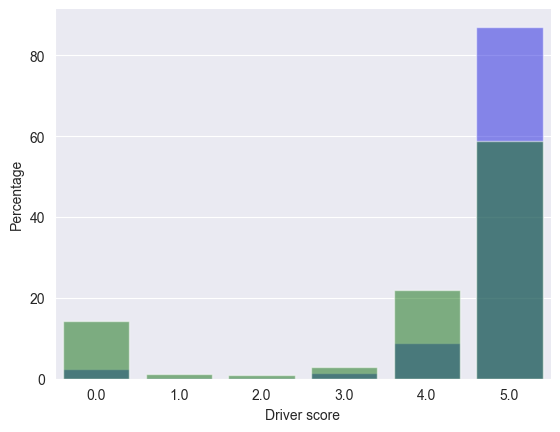

In [40]:
ax = sns.barplot(x="rider_score", y="percentage", data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')

bx = sns.barplot(x="driver_score", y="percentage", data=driver_score_counts, color='green', alpha=0.5)
bx.set(xlabel='Driver score', ylabel='Percentage')

sns.despine()
plt.show()

In [47]:
a = driver_score_counts.rides_count.sum() + rider_score_counts.rides_count.sum()
b  = driver_score_counts.rides_count + rider_score_counts.rides_count

b / a

0    0.062760
1    0.005469
2    0.003993
3    0.019097
4    0.131641
5    0.777040
Name: rides_count, dtype: float64